Connected to venv (Python 3.11.5)

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


2023-09-28 15:02:03.434216: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 15:02:03.482910: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-28 15:02:03.482955: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-28 15:02:03.482991: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-28 15:02:03.491808: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-28 15:02:03.492887: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# train_dir = "./FaceRecognition-tfloading/train/"
# val_dir   = "./FaceRecognition-tfloading/validation/"

train_dir = "./custom_dataset-1/train/"
val_dir = "./custom_dataset-1/validation/"

train_file_names = os.listdir(train_dir)
val_file_names = os.listdir(val_dir)

print("Number of training files: ", len(train_file_names))
print("Number of validation files: ", len(val_file_names))


Number of training files:  48
Number of validation files:  14


In [3]:
train_image_paths = []
train_label_paths = []
for i in range(len(train_file_names)):
    if train_file_names[i].endswith(".jpg"):
        train_image_paths.append(train_file_names[i])
    elif train_file_names[i].endswith(".txt"):
        train_label_paths.append(train_file_names[i])

val_image_paths = []
val_label_paths = []
for i in range(len(val_file_names)):
    if val_file_names[i].endswith(".jpg"):
        val_image_paths.append(val_file_names[i])
    elif val_file_names[i].endswith(".txt"):
        val_label_paths.append(val_file_names[i])

print("Number of training images: ", len(train_image_paths))
print("Number of validation images: ", len(val_image_paths))


Number of training images:  24
Number of validation images:  7


In [4]:
train_image_paths


['face_0.jpg',
 'face_14.jpg',
 'face_1.jpg',
 'face_2.jpg',
 'face_6.jpg',
 'face_13.jpg',
 'face_19.jpg',
 'face_9.jpg',
 'face_17.jpg',
 'face_24.jpg',
 'face_3.jpg',
 'face_29.jpg',
 'face_25.jpg',
 'face_7.jpg',
 'face_4.jpg',
 'face_30.jpg',
 'face_16.jpg',
 'face_23.jpg',
 'face_10.jpg',
 'face_8.jpg',
 'face_26.jpg',
 'face_5.jpg',
 'face_27.jpg',
 'face_12.jpg']

In [5]:
FACTOR = 16
IMG_WIDTH = int(640/FACTOR)
IMG_HEIGHT = int(480/FACTOR)


In [6]:
import matplotlib.pyplot as plt

train_images = []
for i in range(len(train_image_paths)):
    image = plt.imread(train_dir + train_image_paths[i])
    image = image[::FACTOR, ::FACTOR]

    image = image / 255.0
    train_images.append(image)

val_images = []
for i in range(len(val_image_paths)):
    image = plt.imread(val_dir + val_image_paths[i])
    image = image[::FACTOR, ::FACTOR]

    image = image / 255.0
    val_images.append(image)

train_images = np.array(train_images)
val_images = np.array(val_images)


In [7]:
labels = []
for i in range(len(train_label_paths)):
    label = np.loadtxt(train_dir + train_label_paths[i])
    # remove the first element
    label = label[1:]
    labels.append(label)

labels = np.array(labels)

val_labels = []
for i in range(len(val_label_paths)):
    label = np.loadtxt(val_dir + val_label_paths[i])
    # remove the first element
    label = label[1:]
    val_labels.append(label)

val_labels = np.array(val_labels)


In [8]:
print("Shape of training images: ", train_images.shape)
print("Shape of training labels: ", labels.shape)
print("Shape of validation images: ", val_images.shape)
print("Shape of validation labels: ", val_labels.shape)


Shape of training images:  (24, 30, 40, 3)
Shape of training labels:  (24, 4)
Shape of validation images:  (7, 30, 40, 3)
Shape of validation labels:  (7, 4)


In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='linear',input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='linear')
])


In [22]:
# model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [24]:
model.fit(train_images, labels, epochs=5000, validation_data=(val_images, val_labels))

Epoch 1/5000
1/1 [==============================] - 0s 152ms/step - loss: 0.0231 - accuracy: 0.6667 - val_loss: 0.0297 - val_accuracy: 0.7143
Epoch 2/5000
1/1 [==============================] - 0s 95ms/step - loss: 0.0231 - accuracy: 0.6667 - val_loss: 0.0296 - val_accuracy: 0.7143
Epoch 3/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.0231 - accuracy: 0.6667 - val_loss: 0.0296 - val_accuracy: 0.7143
Epoch 4/5000
1/1 [==============================] - 0s 76ms/step - loss: 0.0231 - accuracy: 0.6667 - val_loss: 0.0296 - val_accuracy: 0.7143
Epoch 5/5000
1/1 [==============================] - 0s 78ms/step - loss: 0.0230 - accuracy: 0.6667 - val_loss: 0.0296 - val_accuracy: 0.7143
Epoch 6/5000
1/1 [==============================] - 0s 79ms/step - loss: 0.0230 - accuracy: 0.6667 - val_loss: 0.0295 - val_accuracy: 0.7143
Epoch 7/5000
1/1 [==============================] - 0s 81ms/step - loss: 0.0230 - accuracy: 0.6667 - val_loss: 0.0295 - val_accuracy: 0.7143
Epoch 8/5000

In [28]:
model = tf.keras.models.load_model("./model/5000NoConv2D.keras")


OSError: No file or directory found at ./model/5000NoConv2D.keras

In [103]:
model.save('model/1000NoConv2D.keras')


In [29]:
test_image_path_prefix = "./custom_dataset-1/validation/face_18"
test_image_image = test_image_path_prefix + ".jpg"
test_image_label = test_image_path_prefix + ".txt"


In [30]:
# test
test_image = plt.imread(test_image_image)
test_image = test_image[::FACTOR, ::FACTOR]
test_image = test_image / 255.0
test_image = np.array([test_image])
test_image_image


'./custom_dataset-1/validation/face_18.jpg'

In [31]:
test_label = np.loadtxt(test_image_label)
test_label = test_label[1:]
test_label = np.array([test_label])
test_label


array([[0.6359375 , 0.38125   , 0.625     , 0.75833333]])

In [32]:
from matplotlib import patches as patches
from PIL import Image


In [33]:
def drawPoint(x, y, w, h, c="r"):
    return patches.Rectangle((int(x), int(y)), int(w), int(h), facecolor="none", edgecolor=c)


B1  [[0.67109375 0.42708333 0.6453125  0.85      ]]
B2  [[0.3421875  0.48125    0.575      0.87083333]]
1/1 [==============================] - 0s 33ms/step
X:  0.67109375 Y: 0.4270833333333333 W: 0.6453125 H: 0.85 40 30
X:  0.73592055 Y: 0.49338993 W: 0.56361866 H: 0.7700518 40 30
X PE:  9.659872177177306
Y PE:  15.525448031541783
W PE -12.65957811554176
H PE -9.405673251432528


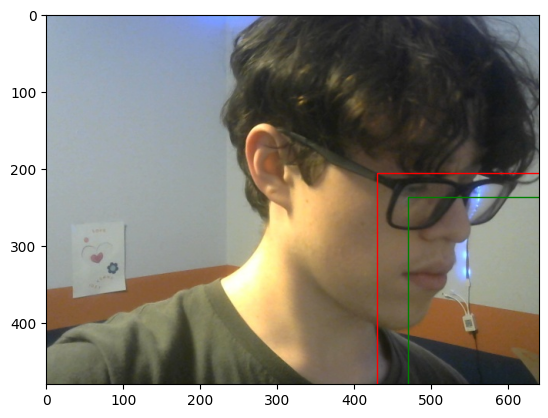

In [35]:

a1 = "./custom_dataset-1/train/face_0.jpg"
b1 = "./custom_dataset-1/train/face_0.txt"
b1 = np.loadtxt(b1)
b1 = b1[1:]
b1 = np.array([b1])

a2 = "./custom_dataset-1/validation/face_15.jpg"
b2 = "./custom_dataset-1/validation/face_15.txt"
b2 = np.loadtxt(b2)
b2 = b2[1:]
b2 = np.array([b2])

print("B1 ", b1)
print("B2 ", b2)

image = plt.imread(a1)
image = image[::FACTOR, ::FACTOR]
image = image / 255.0
image = np.array([image])
image.shape

figure, axis = plt.subplots()

img = Image.open(a1)

axis.imshow(img)

# get prediction
prediction = model.predict(image)[0]

x1, y1, w1, h1 = prediction

# # make rectangle s
axis.add_patch(drawPoint(x1*640, y1*480, w1*640, h1*480, "g"))

x, y, w, h = b1[0]
axis.add_patch(drawPoint(x*640, y*480, w*640, h*480, "r"))
print("X: ", x, "Y:", y, "W:", w, "H:", h, IMG_WIDTH, IMG_HEIGHT)
print("X: ", x1, "Y:", y1, "W:", w1, "H:", h1, IMG_WIDTH, IMG_HEIGHT)

print("X PE: ", (x1-x)/x * 100)
print("Y PE: ", (y1-y)/y * 100)
print("W PE", (w1-w)/w * 100)
print("H PE", (h1-h)/h * 100)
# add
# axis.add_patch(rect_predict)
# axis.add_patch(rect_real)
# draw
plt.show()


In [ ]:
0.19296875*320


In [ ]:
# display image with bounding box
test_label = model.predict(test_image)
test_label = test_label[0]
test_label
